# CALLER AND MUTATIONS COMPARISON

In [32]:
# Needed basic packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Importing filtered mutation tables

In [33]:
import pandas as pd

# Import filtered mutation files from Mutect, Strelka and Sage callers from the three samples (melanoma, sarcoma, lung)
mel_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Mutect2_VAF.tsv.gz', sep="\t", header=0)
mel_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
sar_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_Mutect2_VAF.tsv.gz', sep="\t", header=0)
sar_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
lung_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_Mutect2_VAF.tsv.gz', sep="\t", header=0)
lung_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_Strelka_VAF_all.tsv.gz', sep="\t", header=0)

mel_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_SAGE_VAF.tsv.gz', sep="\t", header=0)
sar_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_SAGE_VAF.tsv.gz', sep="\t", header=0)
lung_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_SAGE_VAF.tsv.gz', sep="\t", header=0)

In [34]:
# Check dimensions of the dataframes so the number of rows is correct
print('Dimensions of melanoma mutations found with Mutect2 (columns x rows):', mel_m_df.shape)
print('Dimensions of melanoma mutations found with Strelka (columns x rows):', mel_s_df.shape)
print('Dimensions of melanoma mutations found with SAGE (columns x rows):', mel_sage_df.shape)

Dimensions of melanoma mutations found with Mutect2 (columns x rows): (1079488, 22)
Dimensions of melanoma mutations found with Strelka (columns x rows): (1279052, 20)
Dimensions of melanoma mutations found with SAGE (columns x rows): (1013333, 22)


In [35]:
print('Dimensions of sarcoma mutations found with Mutect2 (columns x rows):', sar_m_df.shape)
print('Dimensions of sarcoma mutations found with Strelka (columns x rows):', sar_s_df.shape)
print('Dimensions of sarcoma mutations found with SAGE (columns x rows):', sar_sage_df.shape)

Dimensions of sarcoma mutations found with Mutect2 (columns x rows): (25860, 22)
Dimensions of sarcoma mutations found with Strelka (columns x rows): (26140, 20)
Dimensions of sarcoma mutations found with SAGE (columns x rows): (21809, 22)


In [36]:
print('Dimensions of lung mutations found with Mutect2 (columns x rows):', lung_m_df.shape)
print('Dimensions of lung mutations found with Strelka (columns x rows):', lung_s_df.shape)
print('Dimensions of lung mutations found with SAGE (columns x rows):', lung_sage_df.shape)

Dimensions of lung mutations found with Mutect2 (columns x rows): (23011, 22)
Dimensions of lung mutations found with Strelka (columns x rows): (24072, 20)
Dimensions of lung mutations found with SAGE (columns x rows): (20454, 22)


In [37]:
# Check imported table has correct format 
mel_sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_AF,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,mut_type,SAMPLE
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...",...,0.0,55,69,39,69,16,0,0.291,SNV,melanoma
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...",...,0.0,178,176,154,176,24,0,0.135,SNV,melanoma
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,0.0,157,155,134,155,22,0,0.140,SNV,melanoma
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...",...,0.0,232,246,213,246,19,0,0.082,SNV,melanoma
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...",...,0.0,207,182,180,182,27,0,0.130,MNV,melanoma


## a) Represent the number of mutations with each caller

In [38]:
## Extract the number of mutations with the three callers

#For melanoma sample
mel_mutect = len(mel_m_df['FILTER'])
mel_strelka = len(mel_s_df['FILTER'])
mel_sage = len(mel_sage_df['FILTER'])
mut_mel = (mel_mutect, mel_strelka, mel_sage)

# For sarcoma sample
sar_mutect = len(sar_m_df['FILTER'])
sar_strelka = len(sar_s_df['FILTER'])
sar_sage = len(sar_sage_df['FILTER'])
mut_sar = (sar_mutect, sar_strelka, sar_sage)

# For lung sample
lung_mutect = len(lung_m_df['FILTER'])
lung_strelka = len(lung_s_df['FILTER'])
lung_sage = len(lung_sage_df['FILTER'])
mut_lung = (lung_mutect, lung_strelka, lung_sage)

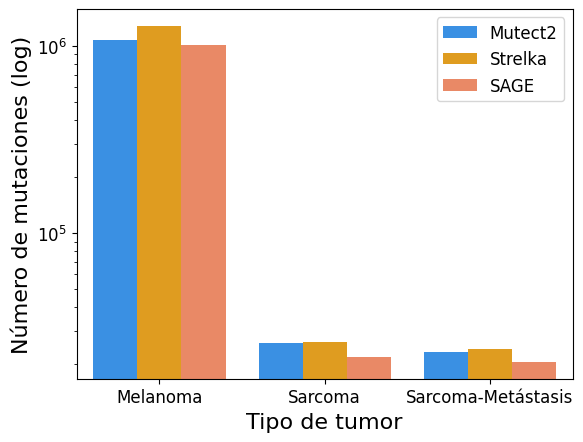

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a dataframe to represent data
mut_df2 = {
    'Tipo de tumor': ['Melanoma', 'Melanoma', 'Melanoma', 'Sarcoma', 'Sarcoma', 'Sarcoma', 'Sarcoma-Metástasis', 'Sarcoma-Metástasis', 'Sarcoma-Metástasis'],
    'Log Número de mutaciones': [mel_mutect, mel_strelka, mel_sage, sar_mutect, sar_strelka, sar_sage, lung_mutect, lung_strelka, lung_sage],
    'Herramienta': ['Mutect2', 'Strelka', 'SAGE', 'Mutect2', 'Strelka', 'SAGE', 'Mutect2', 'Strelka', 'SAGE']
}

mut_df2 = pd.DataFrame(mut_df2)
ax2 = sns.barplot(x='Tipo de tumor', y='Log Número de mutaciones', hue='Herramienta', data=mut_df2, palette=['dodgerblue', 'orange', 'coral'])

# Set the scale to log for better visualization
ax2.set_yscale('log')

# Set labels and title
ax2.set(xlabel='Tipo de tumor', ylabel='Número de mutaciones (log)')
ax2.set_xlabel('Tipo de tumor', fontsize=16)
ax2.set_ylabel('Número de mutaciones (log)', fontsize=16)
# Set font size for ticks
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)  
ax2.legend(fontsize=12)

plt.savefig('/workspace/projects/sjd_melos/exports_images/caller_comparison.png', dpi=300, transparent=True, format='png', bbox_inches='tight')

# Show the plot
plt.show()

## b) Caller comparison considering SNPs and INDEL mutations in consensus mutation list

In [40]:
# Import list of the list of consensus mutations in a minimum of 2 of the 3 callers in each sample
mel_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_List_common_mutations_callers.tsv.gz', sep="\t", header=0)
sar_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_List_common_mutations_callers.tsv.gz', sep="\t", header=0)
lung_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_List_common_mutations_callers.tsv.gz', sep="\t", header=0)

In [41]:
mel_mut_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
0,chr1,59074,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=48,39|5,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:69,0:0.014:69:25,0:38,0:67,0:36,33,0,0",...,69,11,0,18,69,0.379310,SNV,Mutect_Strelka,melanoma,chr1_59074_C_T
1,chr1,60739,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=46,55|4,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:65,0:0.015:65:32,0:30,0:65,0:28,37,0,0",...,65,10,0,36,65,0.217391,SNV,Mutect_Strelka,melanoma,chr1_60739_G_A
2,chr1,86292,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=75,106|6,4;DP...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:106,0:9.164e-03:106:46,0:41,0:106,0:43,63,0,0",...,106,10,0,75,106,0.117647,SNV,Mutect_Strelka,melanoma,chr1_86292_C_T
3,chr1,108632,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=134,78|7,6;DP...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:153,0:6.495e-03:153:74,0:73,0:151,0:104,49...",...,153,13,0,59,153,0.180556,SNV,Mutect_Strelka,melanoma,chr1_108632_C_T
4,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,155,22,0,134,155,0.140000,SNV,Strelka_SAGE,melanoma,chr1_115638_G_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062268,chrY,56824933,.,C,T,293,PASS,LPS=428319;LPS_RC=9;RC=TCTTTA;RC_IDX=2;RC_LF=T...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:518,0:0:518:16364,0:539,0:0,0,0,0,0,518,...",...,518,16,0,399,518,0.039000,SNV,Mutect_SAGE,melanoma,chrY_56824933_C_T
1062269,chrY,56825646,.,G,A,454,PASS,LPS=428320;LPS_RC=4;RC=GAAAGC;RC_IDX=3;RC_LF=A...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:430,0:0:430:13675,0:443,0:0,0,0,0,0,430,...",...,430,16,0,362,430,0.042000,SNV,Mutect_SAGE,melanoma,chrY_56825646_G_A
1062270,chrY,56846085,.,C,T,558,PASS,RC=CTTTG;RC_IDX=2;RC_LF=TTTTTCTACC;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:33:599,1:0.001667:600:18877,0:615,0:0,0,1,...",...,600,21,1,500,599,0.040000,SNV,Mutect_SAGE,melanoma,chrY_56846085_C_T
1062271,chrY,56846554,.,G,A,305,PASS,RC=AGATG;RC_IDX=2;RC_LF=CTGATCACAC;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:9:662,1:0.001508:663:20164,9:683,1:1,0,0,0...",...,663,14,1,513,662,0.027000,SNV,Mutect_SAGE,melanoma,chrY_56846554_G_A


In [42]:
# Filter rows with SNV-MNV from INDEL mutations in melanoma sample
mel_snvmnv_df = mel_mut_df.loc[(mel_mut_df['mut_type'] == 'SNV') | (mel_mut_df['mut_type'] == 'MNV')] 
mel_indels_df = mel_mut_df.loc[mel_mut_df['mut_type'] == 'INDEL']

In [43]:
# Filter rows with SNV-MNV from INDEL mutations in sarcoma sample
sar_snvmnv_df = sar_mut_df.loc[(sar_mut_df['mut_type'] == 'SNV') | (sar_mut_df['mut_type'] == 'MNV')] 
sar_indels_df = sar_mut_df.loc[sar_mut_df['mut_type'] == 'INDEL']

In [44]:
# Filter rows with SNV-MNV from INDEL mutations in sarcoma(lung) sample
lung_snvmnv_df = lung_mut_df.loc[(lung_mut_df['mut_type'] == 'SNV') | (lung_mut_df['mut_type'] == 'MNV')] 
lung_indels_df = lung_mut_df.loc[lung_mut_df['mut_type'] == 'INDEL']

In [45]:
# Calculate the number of mutations based on mutation type per sample prior to representation
mel_snvmnv = len(mel_snvmnv_df)
mel_indels = len(mel_indels_df)
sar_snvmnv = len(sar_snvmnv_df)
sar_indels = len(sar_indels_df)
lung_snvmnv = len(lung_snvmnv_df)
lung_indels = len(lung_indels_df)

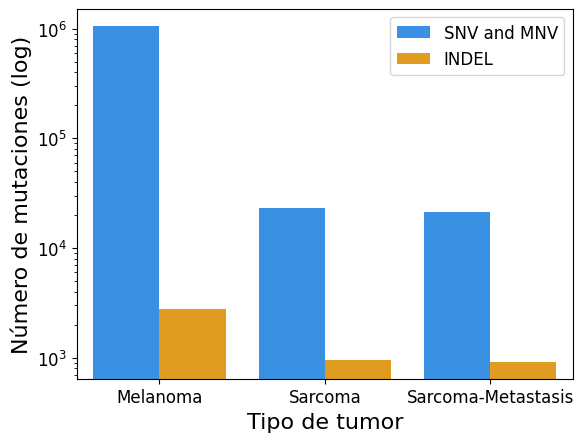

In [48]:
# Make a dataframe to represent data
mut_type_df2 = {
    'Tipo de tumor': ['Melanoma', 'Melanoma', 'Sarcoma', 'Sarcoma', 'Sarcoma-Metastasis', 'Sarcoma-Metastasis'],
    'Número de mutaciones (log)': [mel_snvmnv, mel_indels, sar_snvmnv, sar_indels, lung_snvmnv, lung_indels],
    'Tipo de mutación': ['SNV and MNV', 'INDEL', 'SNV and MNV', 'INDEL', 'SNV and MNV', 'INDEL']
}

mut_type_df2 = pd.DataFrame(mut_type_df2)
ax3 = sns.barplot(x='Tipo de tumor', y='Número de mutaciones (log)', hue='Tipo de mutación', data=mut_type_df2, palette=['dodgerblue', 'orange'])

ax3.set_xlabel('Tipo de tumor', fontsize=16)
ax3.set_ylabel('Número de mutaciones (log)', fontsize=16)
# Set the scale to log for better visualization (base 10)
ax3.set_yscale('log')
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)  
ax3.legend(fontsize=12)

# Set labels and title
ax3.set(xlabel='Tipo de tumor', ylabel='Número de mutaciones (log)')
plt.savefig('/workspace/projects/sjd_melos/exports_images/mut_comparison.png', dpi=300, transparent=True, format='png', bbox_inches='tight')

# Show the plot
plt.show()